# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load data

In [2]:
data = pd.read_csv("Data/mexico_supervised.csv")

# Covert column names

As the column names are in Spanish we'll need to translate them to English.

In [3]:
column_names_mapping = {
    'RESULTADO':'test_result',
    'ENTIDAD':'state',
    'EDAD':'age',
    'SEXO':'sex',
    'NEUMONIA':'pneumonia',
    'DIABETES':'diabetes',
    'ASMA':'asthma',
    'OTRA_COM': 'other_disease',
    'OTRO_CASO':'positive_contact',
    'HIPERTENSION':'hypertension',
    'CARDIOVASCULAR':'cardiovascular',
    'OBESIDAD':'obesity',
    'TABAQUISMO':'smoking',
    'EMBARAZO':'pregnant',
    'UCI':'icu'
}

In [4]:
data.rename(column_names_mapping, inplace=True, axis=1)

# Explore data

Split features and target variable and inspect values.

In [5]:
features = ['state', 'age', 'sex', 'pneumonia', 'other_disease', 'positive_contact', 'diabetes', 'asthma', 'hypertension', 'cardiovascular', 'obesity', 'smoking', 'pregnant', 'icu']
target = ['test_result']

In [6]:
X = data[features]
y = data[target]

## Target

Explore the distribution of the target variable and map values to 0 = negative and 1 = positive to follow convention.

In [7]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263007 entries, 0 to 263006
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   test_result  263007 non-null  int64
dtypes: int64(1)
memory usage: 2.0 MB


In [8]:
y.value_counts()

test_result
2              160348
1              102659
dtype: int64

In [9]:
y['test_result'] = y['test_result'].map({1:1, 2:0})

C:\Users\charl\AppData\Local\Temp\ipykernel_10780\1771698907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['test_result'] = y['test_result'].map({1:1, 2:0})


In [10]:
y.value_counts()

test_result
0              160348
1              102659
dtype: int64

In [11]:
y.value_counts(normalize=True)

test_result
0              0.609672
1              0.390328
dtype: float64

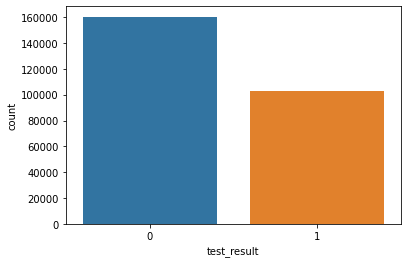

In [12]:
sns.countplot(x='test_result', data=y)
plt.show()

## Features

In [13]:
categorical_cols = ['sex', 'pneumonia', 'other_disease', 'positive_contact', 'diabetes', 'asthma', 'hypertension', 'cardiovascular', 'obesity', 'smoking', 'pregnant', 'icu']
X[categorical_cols] = X[categorical_cols].replace({2:0, 97:np.nan, 98:np.nan, 99:np.nan})

C:\Users\charl\AppData\Local\Temp\ipykernel_10780\2176311626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_cols] = X[categorical_cols].replace({2:0, 97:np.nan, 98:np.nan, 99:np.nan})


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263007 entries, 0 to 263006
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   state             263007 non-null  object 
 1   age               263007 non-null  int64  
 2   sex               263007 non-null  int64  
 3   pneumonia         262993 non-null  float64
 4   other_disease     261663 non-null  float64
 5   positive_contact  179893 non-null  float64
 6   diabetes          261996 non-null  float64
 7   asthma            262084 non-null  float64
 8   hypertension      262069 non-null  float64
 9   cardiovascular    262046 non-null  float64
 10  obesity           262045 non-null  float64
 11  smoking           262025 non-null  float64
 12  pregnant          128141 non-null  float64
 13  icu               62129 non-null   float64
dtypes: float64(11), int64(2), object(1)
memory usage: 28.1+ MB


In [15]:
X.describe()

,age,sex,pneumonia,other_disease,positive_contact,diabetes,asthma,hypertension,cardiovascular,obesity,smoking,pregnant,icu
count,263007.000000,263007.000000,262993.000000,261663.000000,179893.000000,261996.000000,262084.000000,262069.000000,262046.000000,262045.000000,262025.000000,128141.000000,62129.000000
mean,42.591627,0.489318,0.162179,0.036799,0.540410,0.129811,0.036320,0.168795,0.025889,0.166987,0.090560,0.016107,0.075585
std,16.903824,0.499887,0.368616,0.188269,0.498366,0.336096,0.187087,0.374572,0.158803,0.372965,0.286983,0.125889,0.264335
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,53.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
for feature in categorical_cols:
    print(f'\n{feature}\n---')
    print(X[feature].value_counts(normalize=True, dropna=False))


sex
---
0    0.510682
1    0.489318
Name: sex, dtype: float64

pneumonia
---
0.0    0.837776
1.0    0.162171
NaN    0.000053
Name: pneumonia, dtype: float64

other_disease
---
0.0    0.958279
1.0    0.036611
NaN    0.005110
Name: other_disease, dtype: float64

positive_contact
---
1.0    0.369633
NaN    0.316014
0.0    0.314353
Name: positive_contact, dtype: float64

diabetes
---
0.0    0.866844
1.0    0.129312
NaN    0.003844
Name: diabetes, dtype: float64

asthma
---
0.0    0.960298
1.0    0.036193
NaN    0.003509
Name: asthma, dtype: float64

hypertension
---
0.0    0.828240
1.0    0.168193
NaN    0.003566
Name: hypertension, dtype: float64

cardiovascular
---
0.0    0.970552
1.0    0.025794
NaN    0.003654
Name: cardiovascular, dtype: float64

obesity
---
0.0    0.829967
1.0    0.166376
NaN    0.003658
Name: obesity, dtype: float64

smoking
---
0.0    0.906044
1.0    0.090222
NaN    0.003734
Name: smoking, dtype: float64

pregnant
---
NaN    0.512785
0.0    0.479367
1.0    0.00784

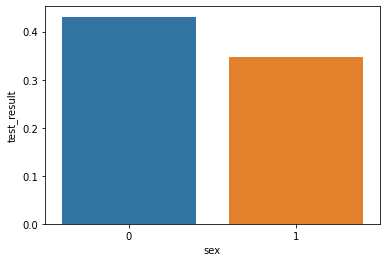

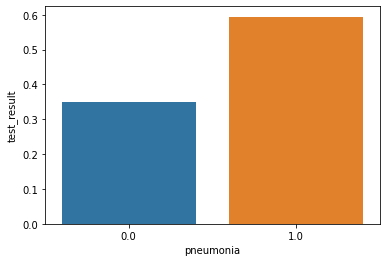

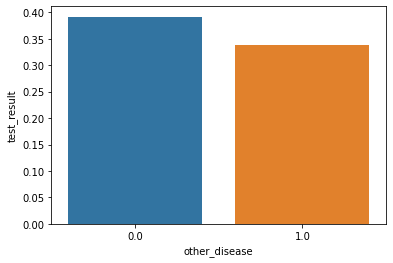

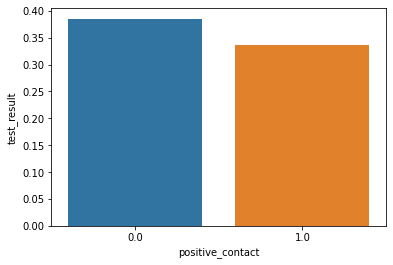

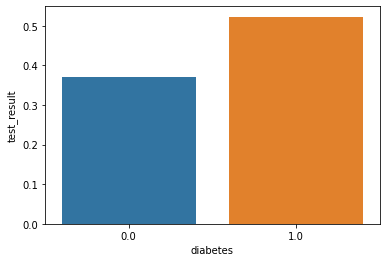

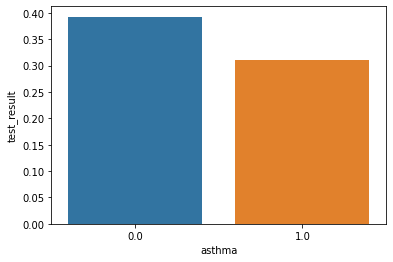

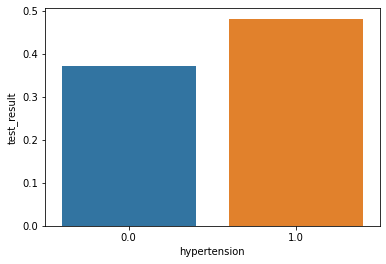

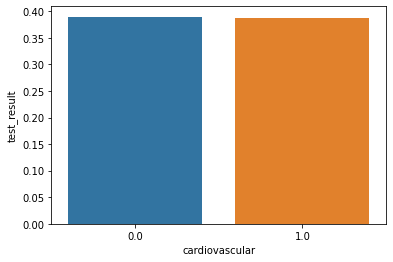

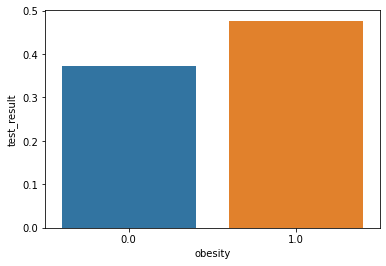

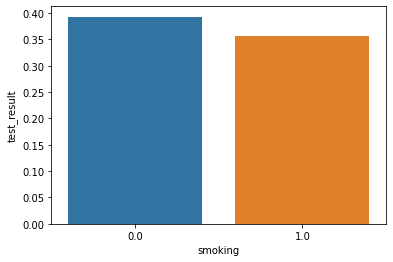

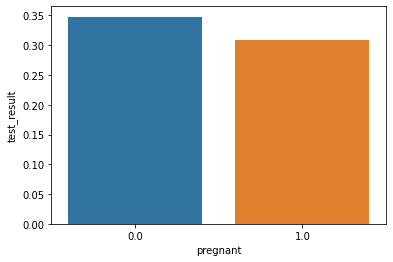

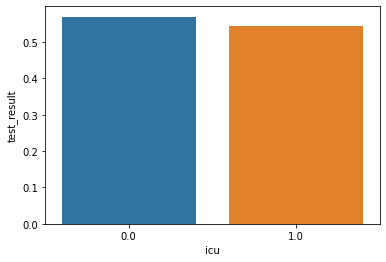

In [17]:
for feature in categorical_cols:
    sns.barplot(x=X[feature], y=y['test_result'], ci=None)
    plt.show()

In [18]:
print(len(X['age'][y['test_result'] == 0]))
print(len(X['age'][y['test_result'] == 1]))

160348
102659


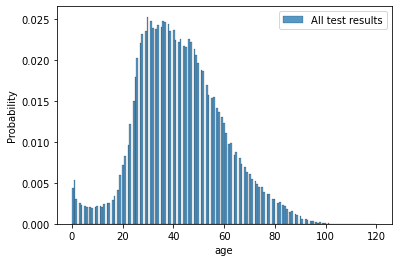

In [19]:
sns.histplot(x=X['age'], stat='probability')
plt.legend(['All test results'])
plt.show()

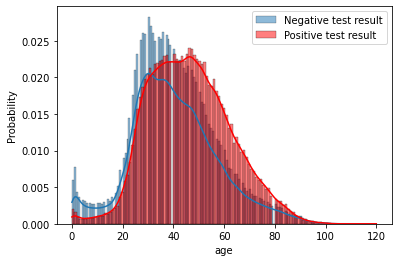

In [20]:
sns.histplot(x=X['age'][y['test_result'] == 0], label='Negative test result', stat='probability', kde=True)
sns.histplot(x=X['age'][y['test_result'] == 1], color='red', label='Positive test result', stat='probability', kde=True)

plt.legend()
plt.show()

In [21]:
X['state'].value_counts(normalize=True).head(10)

Ciudad de Mexico    0.234690
Mexico              0.135936
Jalisco             0.050128
Guanajuato          0.049809
Nuevo Leon          0.048714
Tabasco             0.038094
Baja California     0.033858
Puebla              0.031319
Veracruz            0.030151
Tamaulipas          0.029319
Name: state, dtype: float64

# Feature engineering

Perform rare-encoding on values with <3% of rows.

In [22]:
state_prop = X['state'].value_counts(normalize=True)
rare_states = state_prop[state_prop < 0.03].index.tolist()
print(rare_states)

['Tamaulipas', 'Coahuila', 'Sinaloa', 'Michoacan', 'Sonora', 'Yucatan', 'San Luis Potosi', 'Aguascalientes', 'Guerrero', 'Chihuahua', 'Hidalgo', 'Quintana Roo', 'Oaxaca', 'Chiapas', 'Tlaxcala', 'Morelos', 'Queretaro', 'Durango', 'Baja California Sur', 'Nayarit', 'Zacatecas', 'Campeche', 'Colima']


In [23]:
X['state'].replace(to_replace=rare_states, value="Other", inplace=True)
X['state'].value_counts(normalize=True)

C:\Users\charl\AppData\Local\Temp\ipykernel_10780\4243766405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['state'].replace(to_replace=rare_states, value="Other", inplace=True)


Other               0.347303
Ciudad de Mexico    0.234690
Mexico              0.135936
Jalisco             0.050128
Guanajuato          0.049809
Nuevo Leon          0.048714
Tabasco             0.038094
Baja California     0.033858
Puebla              0.031319
Veracruz            0.030151
Name: state, dtype: float64

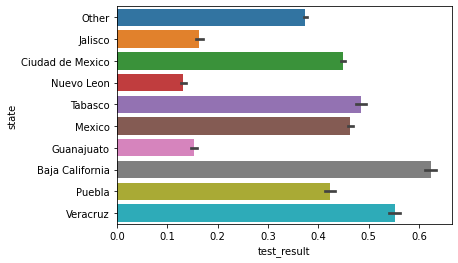

In [24]:
sns.barplot(y=X['state'], x=y['test_result'], orient='h')
plt.show()

In [25]:
X = pd.get_dummies(X, columns=['state'])

In [26]:
X.columns

Index(['age', 'sex', 'pneumonia', 'other_disease', 'positive_contact',
       'diabetes', 'asthma', 'hypertension', 'cardiovascular', 'obesity',
       'smoking', 'pregnant', 'icu', 'state_Baja California',
       'state_Ciudad de Mexico', 'state_Guanajuato', 'state_Jalisco',
       'state_Mexico', 'state_Nuevo Leon', 'state_Other', 'state_Puebla',
       'state_Tabasco', 'state_Veracruz'],
      dtype='object')

# Missing data

In [27]:
X.shape

(263007, 23)

In [28]:
X.isnull().sum()

age                            0
sex                            0
pneumonia                     14
other_disease               1344
positive_contact           83114
diabetes                    1011
asthma                       923
hypertension                 938
cardiovascular               961
obesity                      962
smoking                      982
pregnant                  134866
icu                       200878
state_Baja California          0
state_Ciudad de Mexico         0
state_Guanajuato               0
state_Jalisco                  0
state_Mexico                   0
state_Nuevo Leon               0
state_Other                    0
state_Puebla                   0
state_Tabasco                  0
state_Veracruz                 0
dtype: int64

In [29]:
binary_features = categorical_cols[1:]

In [30]:
for feature in binary_features:
    print(X[feature].value_counts())
    most_frequent_val = X[feature].value_counts().index[0]
    X[feature].fillna(most_frequent_val, inplace=True)
    print(X[feature].value_counts())

0.0    220341
1.0     42652
Name: pneumonia, dtype: int64
0.0    220355
1.0     42652
Name: pneumonia, dtype: int64
0.0    252034
1.0      9629
Name: other_disease, dtype: int64
0.0    253378
1.0      9629
Name: other_disease, dtype: int64
1.0    97216
0.0    82677
Name: positive_contact, dtype: int64
1.0    180330
0.0     82677
Name: positive_contact, dtype: int64
0.0    227986
1.0     34010
Name: diabetes, dtype: int64
0.0    228997
1.0     34010
Name: diabetes, dtype: int64
0.0    252565
1.0      9519
Name: asthma, dtype: int64
0.0    253488
1.0      9519
Name: asthma, dtype: int64
0.0    217833
1.0     44236
Name: hypertension, dtype: int64
0.0    218771
1.0     44236
Name: hypertension, dtype: int64
0.0    255262
1.0      6784
Name: cardiovascular, dtype: int64
0.0    256223
1.0      6784
Name: cardiovascular, dtype: int64
0.0    218287
1.0     43758
Name: obesity, dtype: int64
0.0    219249
1.0     43758
Name: obesity, dtype: int64
0.0    238296
1.0     23729
Name: smoking, dtype

In [31]:
X.isnull().sum()

age                       0
sex                       0
pneumonia                 0
other_disease             0
positive_contact          0
diabetes                  0
asthma                    0
hypertension              0
cardiovascular            0
obesity                   0
smoking                   0
pregnant                  0
icu                       0
state_Baja California     0
state_Ciudad de Mexico    0
state_Guanajuato          0
state_Jalisco             0
state_Mexico              0
state_Nuevo Leon          0
state_Other               0
state_Puebla              0
state_Tabasco             0
state_Veracruz            0
dtype: int64

# Standardization

In [32]:
X['age']

0         74
1         71
2         50
3         25
4         28
          ..
263002    39
263003    53
263004    65
263005    71
263006    18
Name: age, Length: 263007, dtype: int64

In [33]:
scaler = StandardScaler()
scaler.fit(X[['age']])

StandardScaler()

In [34]:
age_scaled = scaler.transform(X[['age']])

In [35]:
X['age_scaled'] = pd.Series(age_scaled.reshape(-1))

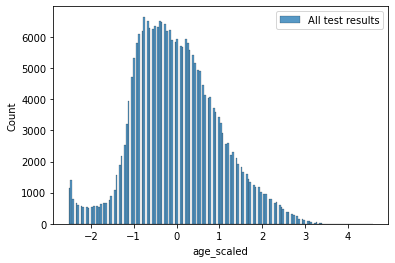

In [36]:
sns.histplot(x=X['age_scaled'])
plt.legend(['All test results'])
plt.show()

In [37]:
X.drop('age', axis=1, inplace=True)

# Model building

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263007 entries, 0 to 263006
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   sex                     263007 non-null  int64  
 1   pneumonia               263007 non-null  float64
 2   other_disease           263007 non-null  float64
 3   positive_contact        263007 non-null  float64
 4   diabetes                263007 non-null  float64
 5   asthma                  263007 non-null  float64
 6   hypertension            263007 non-null  float64
 7   cardiovascular          263007 non-null  float64
 8   obesity                 263007 non-null  float64
 9   smoking                 263007 non-null  float64
 10  pregnant                263007 non-null  float64
 11  icu                     263007 non-null  float64
 12  state_Baja California   263007 non-null  uint8  
 13  state_Ciudad de Mexico  263007 non-null  uint8  
 14  state_Guanajuato    

In [40]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_classif
import shap

c:\Users\charl\miniconda3\envs\mat099\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [41]:
np.random.seed(42)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [51]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_train_pred = xgb_model.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77    128278
           1       0.65      0.38      0.48     82127

    accuracy                           0.68    210405
   macro avg       0.67      0.62      0.62    210405
weighted avg       0.67      0.68      0.65    210405



In [52]:
cross_val_score(xgb.XGBClassifier(), X_train, y_train, scoring="accuracy")

array([0.66780732, 0.66443288, 0.66918562, 0.67179962, 0.66890045])

## Feature selection

In [ ]:
scores={}
for i in [5, 10, 15, 20, 'all']:
    selector = SelectKBest(f_classif, k=i)
    selector.fit(X_train, y_train)
    features_kept = selector.get_support(indices=True)
    X_train_reduced = selector.transform(X_train)
    score = cross_val_score(LogisticRegression(), X_train_reduced, y_train, scoring="accuracy")
    scores[i] = [score.mean(), features_kept]

In [197]:
scores

{5: [0.6505976568997884, array([ 1,  4, 14, 17, 22], dtype=int64)],
 10: [0.660516622703833,
  array([ 0,  1,  4,  6,  8, 12, 14, 15, 17, 22], dtype=int64)],
 15: [0.6633349967919013,
  array([ 0,  1,  4,  6,  8, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22],
        dtype=int64)],
 20: [0.6656590860483353,
  array([ 0,  1,  2,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
         20, 21, 22], dtype=int64)],
 'all': [0.6656400750932725,
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22], dtype=int64)]}

## Shapley values

In [46]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


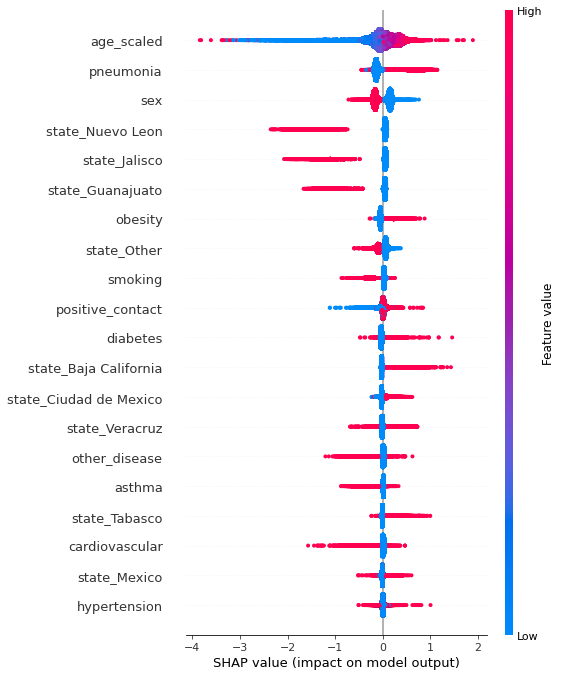

In [49]:
shap.summary_plot(shap_values, X)